In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import pickle as pk

In [216]:
car_dheko = pd.read_csv('car_dheko.csv')

In [218]:
car_dheko.head(10)

,Car_brand,Year_of_manufacture,Kilometers_driven,Number_of_previous_owners,Transmission_type,Fuel_type,Body_type,Price_of_the_used_car,Engine_Displacement,Mileage,Wheel Base,Seats,No of Cylinder,City
0,Maruti,2015,120000,3,Manual,Petrol,Hatchback,400000,998,23.10,2425,5,3,Bangalore
1,Ford,2018,32706,2,Manual,Petrol,SUV,811000,1497,17.00,2519,5,3,Bangalore
2,Tata,2018,11949,1,Manual,Petrol,Hatchback,585000,1199,23.84,2400,5,3,Bangalore
3,Hyundai,2014,17794,1,Manual,Petrol,Sedan,462000,1197,19.10,2425,5,4,Bangalore
4,Maruti,2015,60000,1,Manual,Diesel,SUV,790000,1248,23.65,2600,5,4,Bangalore
5,Jeep,2020,20000,1,Manual,Diesel,SUV,1900000,1956,17.10,2636,5,4,Bangalore
6,Datsun,2017,37772,1,Manual,Petrol,Hatchback,345000,1198,20.63,2450,5,3,Bangalore
7,Hyundai,2021,30000,1,Automatic,Petrol,SUV,1200000,998,18.15,2500,5,3,Bangalore
8,Maruti,2018,37000,1,Automatic,Petrol,Sedan,960000,1462,20.28,2650,5,4,Bangalore
9,Tata,2017,11949,1,Manual,Petrol,Hatchback,585000,1199,23.84,2400,5,3,Bangalore


In [220]:
car_dheko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Car_brand                  8368 non-null   object 
 1   Year_of_manufacture        8368 non-null   int64  
 2   Kilometers_driven          8368 non-null   int64  
 3   Number_of_previous_owners  8368 non-null   int64  
 4   Transmission_type          8368 non-null   object 
 5   Fuel_type                  8368 non-null   object 
 6   Body_type                  8368 non-null   object 
 7   Price_of_the_used_car      8368 non-null   int64  
 8   Engine_Displacement        8368 non-null   int64  
 9   Mileage                    8368 non-null   float64
 10  Wheel Base                 8368 non-null   int64  
 11  Seats                      8368 non-null   int64  
 12  No of Cylinder             8368 non-null   int64  
 13  City                       8368 non-null   objec

In [222]:
car_dheko['Year_of_manufacture'].unique()

array([2015, 2018, 2014, 2020, 2017, 2021, 2019, 2022, 2016, 2011, 2009,
       2013, 2010, 2008, 2006, 2012, 2005, 2007, 2023, 1995, 1998, 2004,
       2003, 2001, 2002, 2000, 1985, 1997, 1999], dtype=int64)

In [224]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc_yr = OrdinalEncoder()
encoded_data = ord_enc_yr.fit_transform(car_dheko[['Year_of_manufacture']])

In [226]:
pk.dump(ord_enc_yr,open('Year_of_manufacture1.pkl', 'wb'))

In [228]:
categories = ord_enc_yr.categories_

In [230]:
categories

[array([1985, 1995, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
        2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)]

In [232]:
car_dheko['year_encoded'] = encoded_data
car_dheko['year_encoded'] = car_dheko['year_encoded'].astype(int)

In [234]:
car_dheko['Car_brand'].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Hindustan Motors', 'Porsche'], dtype=object)

In [236]:
car_dheko['Car_brand'].value_counts()

Car_brand
Maruti                2252
Hyundai               1651
Honda                  865
Tata                   431
Mahindra               376
Toyota                 325
Renault                312
Ford                   311
Volkswagen             294
Mercedes-Benz          245
BMW                    184
Skoda                  161
Kia                    158
Audi                   156
Jeep                   112
MG                      90
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  35
Fiat                    31
Mitsubishi              14
Mini                    12
Citroen                  8
Porsche                  6
Mahindra Renault         5
Isuzu                    5
Lexus                    5
Hindustan Motors         4
Mahindra Ssangyong       4
Opel                     3
Name: count, dtype: int64

In [238]:
from sklearn.preprocessing import OneHotEncoder
one_en = OneHotEncoder(sparse_output = False)
encoded_data = one_en.fit_transform(car_dheko[['Car_brand']])
encoded_df = pd.DataFrame(encoded_data, columns=one_en.get_feature_names_out())
encoded_df = encoded_df.astype(int)

In [240]:
pk.dump(one_en,open('Car_brand.pkl', 'wb'))

In [242]:
encoded_df.columns

Index(['Car_brand_Audi', 'Car_brand_BMW', 'Car_brand_Chevrolet',
       'Car_brand_Citroen', 'Car_brand_Datsun', 'Car_brand_Fiat',
       'Car_brand_Ford', 'Car_brand_Hindustan Motors', 'Car_brand_Honda',
       'Car_brand_Hyundai', 'Car_brand_Isuzu', 'Car_brand_Jaguar',
       'Car_brand_Jeep', 'Car_brand_Kia', 'Car_brand_Land Rover',
       'Car_brand_Lexus', 'Car_brand_MG', 'Car_brand_Mahindra',
       'Car_brand_Mahindra Renault', 'Car_brand_Mahindra Ssangyong',
       'Car_brand_Maruti', 'Car_brand_Mercedes-Benz', 'Car_brand_Mini',
       'Car_brand_Mitsubishi', 'Car_brand_Nissan', 'Car_brand_Opel',
       'Car_brand_Porsche', 'Car_brand_Renault', 'Car_brand_Skoda',
       'Car_brand_Tata', 'Car_brand_Toyota', 'Car_brand_Volkswagen',
       'Car_brand_Volvo'],
      dtype='object')

In [244]:
car_dheko['Price_of_the_used_car'].value_counts()

Price_of_the_used_car
650000     106
450000      98
500000      97
300000      97
400000      90
          ... 
997000       1
4290000      1
628000       1
788000       1
1082000      1
Name: count, Length: 1400, dtype: int64

In [246]:
car_dheko['Price_in_lakhs'] = car_dheko['Price_of_the_used_car'] / 100000

In [248]:
car_dheko = car_dheko.drop(['Price_of_the_used_car','Year_of_manufacture'],axis=1)

In [250]:
car_dheko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Car_brand                  8368 non-null   object 
 1   Kilometers_driven          8368 non-null   int64  
 2   Number_of_previous_owners  8368 non-null   int64  
 3   Transmission_type          8368 non-null   object 
 4   Fuel_type                  8368 non-null   object 
 5   Body_type                  8368 non-null   object 
 6   Engine_Displacement        8368 non-null   int64  
 7   Mileage                    8368 non-null   float64
 8   Wheel Base                 8368 non-null   int64  
 9   Seats                      8368 non-null   int64  
 10  No of Cylinder             8368 non-null   int64  
 11  City                       8368 non-null   object 
 12  year_encoded               8368 non-null   int32  
 13  Price_in_lakhs             8368 non-null   float

In [252]:
corr_data = car_dheko.select_dtypes(include=['int32', 'int64', 'float64']).corr()

In [254]:
corr_data

,Kilometers_driven,Number_of_previous_owners,Engine_Displacement,Mileage,Wheel Base,Seats,No of Cylinder,year_encoded,Price_in_lakhs
Kilometers_driven,1.000000,0.115490,0.091053,-0.010580,0.030366,0.074826,0.082313,-0.246113,-0.077375
Number_of_previous_owners,0.115490,1.000000,0.054677,-0.088345,-0.043339,0.010813,0.038091,-0.391507,-0.120455
Engine_Displacement,0.091053,0.054677,1.000000,-0.564296,0.783101,0.414518,0.648656,-0.044715,0.536004
Mileage,-0.010580,-0.088345,-0.564296,1.000000,-0.498920,-0.308931,-0.324705,0.127818,-0.275472
Wheel Base,0.030366,-0.043339,0.783101,-0.498920,1.000000,0.372094,0.519336,0.143345,0.572276
Seats,0.074826,0.010813,0.414518,-0.308931,0.372094,1.000000,0.107617,0.004823,0.083816
No of Cylinder,0.082313,0.038091,0.648656,-0.324705,0.519336,0.107617,1.000000,-0.083081,0.407745
year_encoded,-0.246113,-0.391507,-0.044715,0.127818,0.143345,0.004823,-0.083081,1.000000,0.300511
Price_in_lakhs,-0.077375,-0.120455,0.536004,-0.275472,0.572276,0.083816,0.407745,0.300511,1.000000


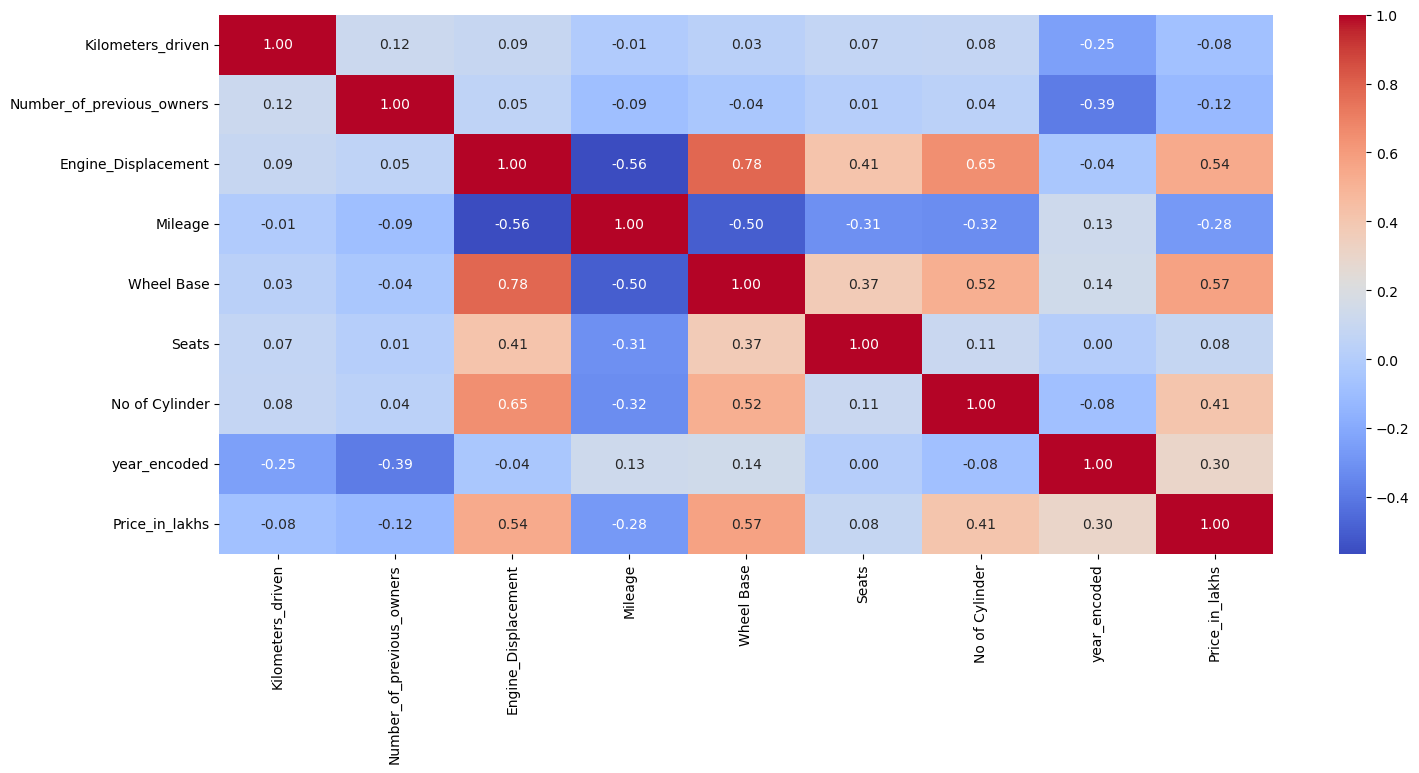

In [256]:
plt.figure(figsize=(17, 7))
sns.heatmap(corr_data, fmt=".2f", annot= True, cmap= "coolwarm")
plt.show()

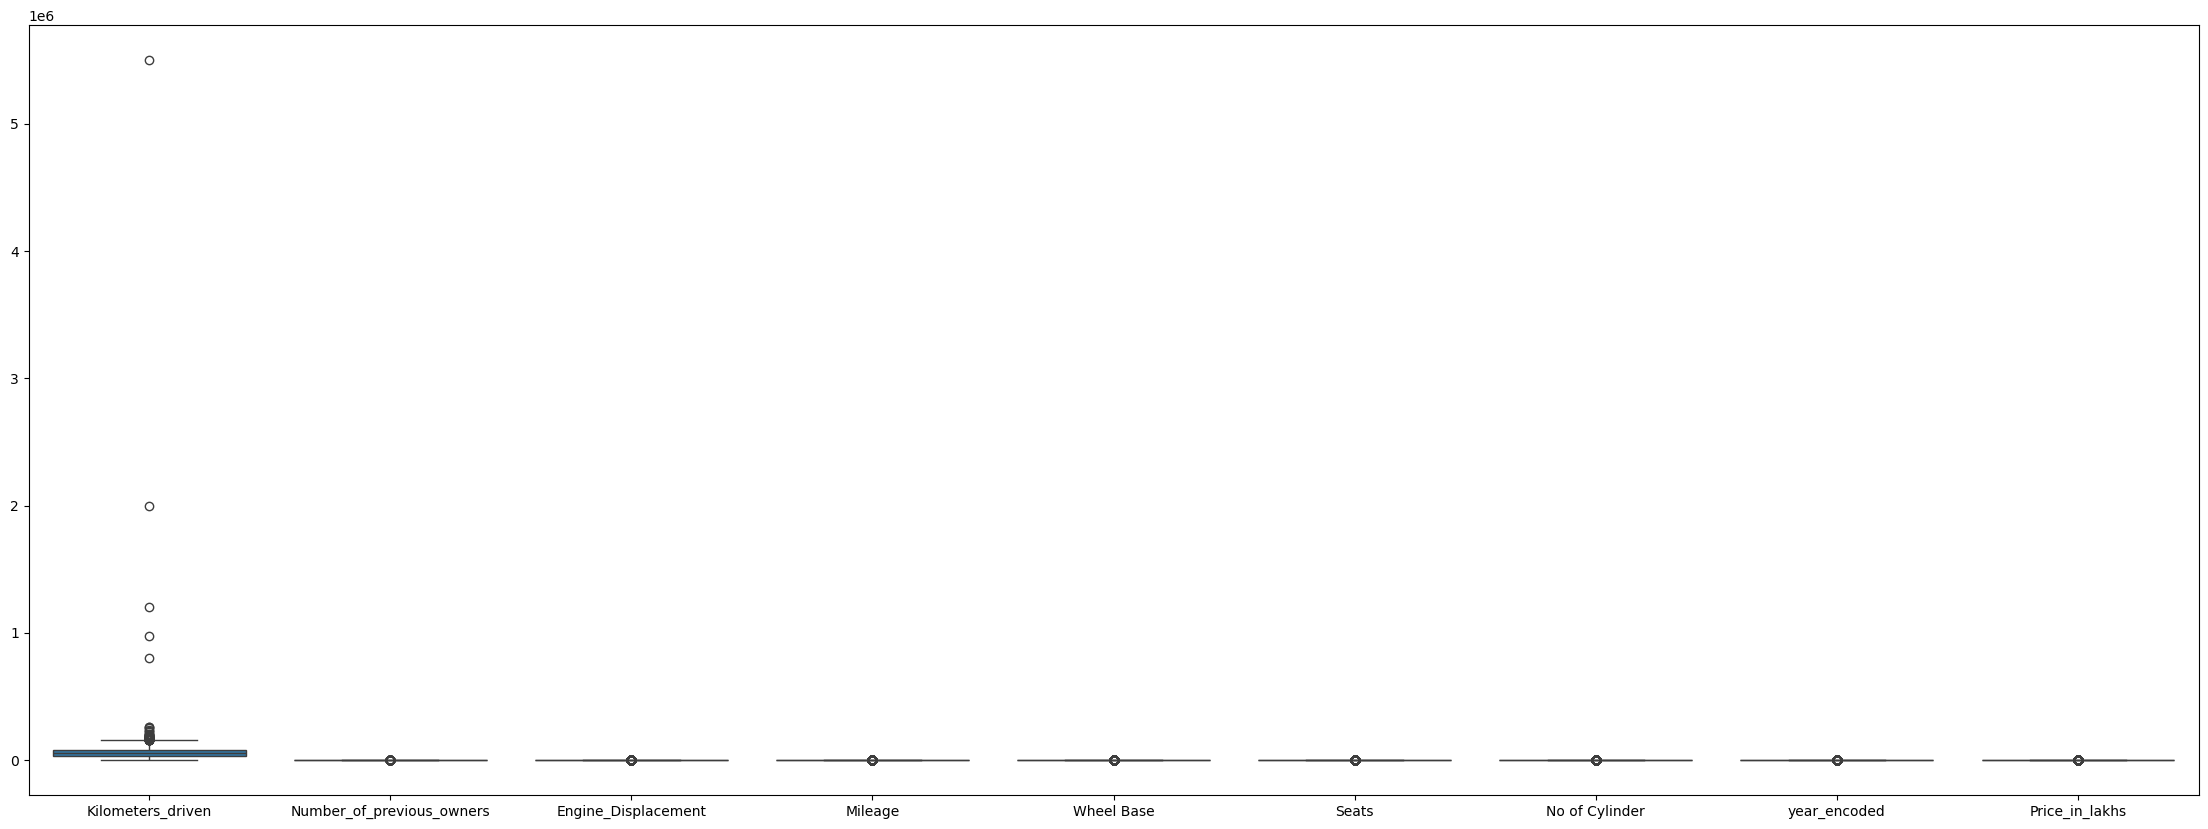

In [258]:
plt.figure(figsize= (28, 10))
sns.boxplot(data = car_dheko)
plt.show()

In [472]:
car_dheko['Transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [474]:
car_dheko['Fuel_type'].unique()

array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object)

In [476]:
car_dheko['Body_type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [478]:
car_dheko['Body_type'].value_counts()

Body_type
Hatchback        3569
SUV              2226
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [ ]:
car_dheko['Transmission_type'].replace(['Manual', 'Automatic'], [1,2], inplace = True)
car_dheko['Fuel_type'].replace(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], [1,2,3,4,5], inplace = True)
car_dheko['Body_type'].replace(['Hatchback', 'Minivans', 'Wagon', 'Pickup Trucks', 'Sedan', 'SUV', 'MUV', 'Hybrids', 
                                'Convertibles', 'Coupe'], [1,2,3,4,5,6,7,8,9,10], inplace = True)
car_dheko['City'].replace(['Bangalore', 'Delhi', 'Chennai', 'Hyderabad', 'Kolkata', 'Jaipur'], [1,2,3,4,5,6], inplace = True)

In [262]:
car_dheko.head()

,Car_brand,Kilometers_driven,Number_of_previous_owners,Transmission_type,Fuel_type,Body_type,Engine_Displacement,Mileage,Wheel Base,Seats,No of Cylinder,City,year_encoded,Price_in_lakhs
0,Maruti,120000,3,1,1,1,998,23.10,2425,5,3,1,20,4.00
1,Ford,32706,2,1,1,6,1497,17.00,2519,5,3,1,23,8.11
2,Tata,11949,1,1,1,1,1199,23.84,2400,5,3,1,23,5.85
3,Hyundai,17794,1,1,1,5,1197,19.10,2425,5,4,1,19,4.62
4,Maruti,60000,1,1,2,6,1248,23.65,2600,5,4,1,20,7.90


In [264]:
car_dheko['Engine_Category'] = pd.cut(car_dheko['Engine_Displacement'], 
                               bins=[0, 500, 900, 1100, 1200, 1300, 1400, 1500, 1600, 2000, 3000, 4000, 5001], 
                               labels=['0-500','501-900','901-1100', '1101-1200', '1201-1300', '1301-1400', '1401-1500', '1501-1600','1601-2000', '2001-3000', '3001-4000', '4001-5001'], right = False)

In [266]:
car_dheko['Engine_Category'].value_counts()

Engine_Category
1101-1200    2502
1401-1500    1393
901-1100     1214
1601-2000     814
2001-3000     745
1201-1300     457
1501-1600     412
501-900       386
1301-1400     380
3001-4000      30
0-500          27
4001-5001       8
Name: count, dtype: int64

In [268]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
encoded_data = ord_enc.fit_transform(car_dheko[['Engine_Category']])

In [270]:
car_dheko['Engine_encoded'] = encoded_data

In [272]:
pk.dump(ord_enc,open('engine.pkl', 'wb'))

In [274]:
categories = ord_enc.categories_

In [276]:
categories

[array(['0-500', '1101-1200', '1201-1300', '1301-1400', '1401-1500',
        '1501-1600', '1601-2000', '2001-3000', '3001-4000', '4001-5001',
        '501-900', '901-1100'], dtype=object)]

In [279]:
data = pd.concat([car_dheko, encoded_df], axis=1)

In [281]:
data.head()

,Car_brand,Kilometers_driven,Number_of_previous_owners,Transmission_type,Fuel_type,Body_type,Engine_Displacement,Mileage,Wheel Base,Seats,...,Car_brand_Mitsubishi,Car_brand_Nissan,Car_brand_Opel,Car_brand_Porsche,Car_brand_Renault,Car_brand_Skoda,Car_brand_Tata,Car_brand_Toyota,Car_brand_Volkswagen,Car_brand_Volvo
0,Maruti,120000,3,1,1,1,998,23.10,2425,5,...,0,0,0,0,0,0,0,0,0,0
1,Ford,32706,2,1,1,6,1497,17.00,2519,5,...,0,0,0,0,0,0,0,0,0,0
2,Tata,11949,1,1,1,1,1199,23.84,2400,5,...,0,0,0,0,0,0,1,0,0,0
3,Hyundai,17794,1,1,1,5,1197,19.10,2425,5,...,0,0,0,0,0,0,0,0,0,0
4,Maruti,60000,1,1,2,6,1248,23.65,2600,5,...,0,0,0,0,0,0,0,0,0,0


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Car_brand                     8368 non-null   object  
 1   Kilometers_driven             8368 non-null   int64   
 2   Number_of_previous_owners     8368 non-null   int64   
 3   Transmission_type             8368 non-null   int64   
 4   Fuel_type                     8368 non-null   int64   
 5   Body_type                     8368 non-null   int64   
 6   Engine_Displacement           8368 non-null   int64   
 7   Mileage                       8368 non-null   float64 
 8   Wheel Base                    8368 non-null   int64   
 9   Seats                         8368 non-null   int64   
 10  No of Cylinder                8368 non-null   int64   
 11  City                          8368 non-null   int64   
 12  year_encoded                  8368 non-null   in

In [285]:
data = data.drop(['Car_brand', 'Engine_Category','Engine_Displacement'],axis=1)

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kilometers_driven             8368 non-null   int64  
 1   Number_of_previous_owners     8368 non-null   int64  
 2   Transmission_type             8368 non-null   int64  
 3   Fuel_type                     8368 non-null   int64  
 4   Body_type                     8368 non-null   int64  
 5   Mileage                       8368 non-null   float64
 6   Wheel Base                    8368 non-null   int64  
 7   Seats                         8368 non-null   int64  
 8   No of Cylinder                8368 non-null   int64  
 9   City                          8368 non-null   int64  
 10  year_encoded                  8368 non-null   int32  
 11  Price_in_lakhs                8368 non-null   float64
 12  Engine_encoded                8368 non-null   float64
 13  Car

In [507]:
# Target and Value data

In [289]:
value = data.drop('Price_in_lakhs', axis = 1)

tar = data['Price_in_lakhs']

In [291]:
# Train data test splitting 
train_data, test_data, train_lab, test_lab = train_test_split(value, tar, test_size= 0.20, random_state= 50)

In [293]:
train_data

,Kilometers_driven,Number_of_previous_owners,Transmission_type,Fuel_type,Body_type,Mileage,Wheel Base,Seats,No of Cylinder,City,...,Car_brand_Mitsubishi,Car_brand_Nissan,Car_brand_Opel,Car_brand_Porsche,Car_brand_Renault,Car_brand_Skoda,Car_brand_Tata,Car_brand_Toyota,Car_brand_Volkswagen,Car_brand_Volvo
5278,40000,1,1,2,6,16.00,2700,7,4,2,...,0,0,0,0,0,0,0,0,0,0
2038,86630,1,1,2,1,22.90,2430,5,4,3,...,0,0,0,0,0,0,0,0,0,0
948,54097,1,1,1,6,17.50,2555,5,4,1,...,0,0,0,0,0,0,0,0,0,0
8306,53562,3,1,1,1,20.36,2380,5,4,5,...,0,0,0,0,0,0,0,0,0,0
7945,38380,1,2,1,6,11.67,2750,6,4,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8262,55000,1,1,1,1,18.70,2530,5,4,5,...,0,0,0,0,0,0,0,0,0,0
6214,120000,3,1,1,6,13.10,2620,5,4,6,...,0,0,0,0,0,0,0,0,0,0
8324,7000,1,1,1,1,21.79,2435,5,3,5,...,0,0,0,0,0,0,0,0,0,0
6253,70000,2,2,2,5,18.88,2810,5,4,6,...,0,0,0,0,0,0,0,0,0,0


In [295]:
test_data

,Kilometers_driven,Number_of_previous_owners,Transmission_type,Fuel_type,Body_type,Mileage,Wheel Base,Seats,No of Cylinder,City,...,Car_brand_Mitsubishi,Car_brand_Nissan,Car_brand_Opel,Car_brand_Porsche,Car_brand_Renault,Car_brand_Skoda,Car_brand_Tata,Car_brand_Toyota,Car_brand_Volkswagen,Car_brand_Volvo
8117,22276,1,1,1,5,20.73,2650,5,4,5,...,0,0,0,0,0,0,0,0,0,0
1145,48285,1,1,1,1,18.60,2570,5,4,1,...,0,0,0,0,0,0,0,0,0,0
8174,61901,1,2,2,6,17.90,2699,5,4,5,...,0,0,0,0,0,0,0,0,0,0
154,10000,1,2,1,1,22.00,2422,5,3,1,...,0,0,0,0,1,0,0,0,0,0
5640,3200,1,1,2,6,20.80,2610,5,4,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,37942,0,1,1,1,20.51,2400,5,3,3,...,0,0,0,0,0,0,0,0,0,0
8085,19000,1,2,2,6,12.40,2950,6,4,5,...,0,0,0,0,0,0,0,0,0,0
677,41000,2,2,1,1,18.40,2345,5,4,1,...,0,0,0,0,0,0,0,0,0,0
1947,106338,2,1,2,6,18.49,2680,7,3,3,...,0,0,0,0,0,0,0,0,0,0


# Model Building

## Linear Regression

In [299]:
model = LinearRegression()

In [301]:
model.fit(train_data, train_lab)

LinearRegression()

In [303]:
pred_value = model.predict(test_data)
pred_train = model.predict(train_data)

In [305]:
def get_perform(test_lab, pred_value):
    results = []
    results.append(mean_squared_error(test_lab, pred_value))
    results.append(np.sqrt(results[0]))
    results.append(mean_absolute_error(test_lab, pred_value))
    results.append(r2_score(test_lab, pred_value))
    return (results)

In [98]:
get_perform(train_lab, pred_train)

[80.23656696033156, 8.95748664304511, 66.88, 0.5843124411907876]

In [100]:
get_perform(test_lab, pred_value)

[114.60376764872618, 10.705314925247468, 67.16, 0.5032453618095847]

In [307]:
get_perform(train_lab, pred_train)

[80.28109243129848, 8.95997167580894, 3.6392123497162205, 0.5840817647669045]

In [309]:
get_perform(test_lab, pred_value)

[115.83097050882347, 10.76247975648844, 3.784039653496479, 0.4979260016763085]

In [312]:
model_train_scores = pd.DataFrame(index = ['MSE', ' Root MSE', 'MAE', 'R2 Score'])
tr_results = get_perform(train_lab, pred_train)
model_train_scores['Linear Regression'] = tr_results

In [315]:
model_test_scores = pd.DataFrame(index = ['MSE', ' Root MSE', 'MAE', 'R2 Score'])
ts_results = get_perform(test_lab, pred_value)
model_test_scores['Linear Regression'] = ts_results

In [317]:
model_train_scores

,Linear Regression
MSE,80.281092
Root MSE,8.959972
MAE,3.639212
R2 Score,0.584082


In [319]:
model_test_scores

,Linear Regression
MSE,115.830971
Root MSE,10.762480
MAE,3.784040
R2 Score,0.497926


## Lasso Model

In [323]:
lasso_model = Lasso(alpha= 0.1)

In [325]:
lasso_model.fit(train_data, train_lab)

Lasso(alpha=0.1)

In [327]:
lpredtr = lasso_model.predict(train_data)
lpredts = lasso_model.predict(test_data)

In [329]:
get_perform(train_lab, lpredtr)

[88.8157530588211, 9.424211004578638, 4.177669381641654, 0.5398656127563883]

In [331]:
get_perform(test_lab, lpredts)

[134.37417460175973, 11.59198751732246, 4.37904378698809, 0.4175497380589407]

In [96]:
get_perform(train_lab, lpredtr)

[88.44405555519407, 9.40446997736683, 4.183574798084909, 0.5417912936990262]

In [98]:
get_perform(test_lab, lpredts)

[135.3344168703033, 11.633332148198267, 4.390679174761777, 0.41338752934214207]

In [333]:
tr_results = get_perform(train_lab, lpredtr)
model_train_scores['Lasso Regression'] = tr_results

In [336]:
lr_results = get_perform(test_lab, lpredts)
model_test_scores['Lasso Regression'] = lr_results

In [338]:
model_train_scores

,Linear Regression,Lasso Regression
MSE,80.281092,88.815753
Root MSE,8.959972,9.424211
MAE,3.639212,4.177669
R2 Score,0.584082,0.539866


In [340]:
model_test_scores

,Linear Regression,Lasso Regression
MSE,115.830971,134.374175
Root MSE,10.762480,11.591988
MAE,3.784040,4.379044
R2 Score,0.497926,0.417550


## Ridge Model

In [342]:
ridge_model = Ridge(alpha= 2)

In [344]:
ridge_model.fit(train_data, train_lab)

Ridge(alpha=2)

In [346]:
rtrpred = ridge_model.predict(train_data)
rtspred = ridge_model.predict(test_data)

In [348]:
get_perform(train_lab, rtrpred)

[80.53239887201204, 8.973984559381192, 3.6822640714291004, 0.5827798027711364]

In [350]:
get_perform(test_lab, rtspred)

[116.0149788587153, 10.771024967880972, 3.811211247429403, 0.4971284100861725]

In [116]:
get_perform(train_lab, rtrpred)

[80.21097620562306, 8.956058072926004, 3.715331834591784, 0.5844450211198133]

In [118]:
get_perform(test_lab, rtspred)

[114.72748332339573, 10.71109160279174, 3.837194922074518, 0.5027091112440942]

In [352]:
tr_results = get_perform(train_lab, rtrpred)
model_train_scores['Ridge Regression'] = tr_results

In [355]:
tr_results = get_perform(test_lab, rtspred)
model_test_scores['Ridge Regression'] = tr_results

In [358]:
model_train_scores

,Linear Regression,Lasso Regression,Ridge Regression
MSE,80.281092,88.815753,80.532399
Root MSE,8.959972,9.424211,8.973985
MAE,3.639212,4.177669,3.682264
R2 Score,0.584082,0.539866,0.582780


In [360]:
model_test_scores

,Linear Regression,Lasso Regression,Ridge Regression
MSE,115.830971,134.374175,116.014979
Root MSE,10.762480,11.591988,10.771025
MAE,3.784040,4.379044,3.811211
R2 Score,0.497926,0.417550,0.497128


## Decision Tree Regressor

In [362]:
dt_model = DecisionTreeRegressor(max_depth= 10,criterion='poisson',random_state= 56)

In [364]:
dt_model.fit(train_data, train_lab)

DecisionTreeRegressor(criterion='poisson', max_depth=10, random_state=56)

In [366]:
dttr_pred = dt_model.predict(train_data)
dtts_pred = dt_model.predict(test_data)

In [272]:
get_perform(train_lab, dttr_pred)

[5.522762912415895, 2.3500559381461317, 14.77, 0.9713878108209787]

In [274]:
get_perform(test_lab, dtts_pred)

[30.986698184804244, 5.566569696393304, 19.7, 0.8656869109863063]

In [368]:
get_perform(train_lab, dttr_pred)

[5.522762912415895, 2.3500559381461317, 1.1739502785562985, 0.9713878108209787]

In [370]:
get_perform(test_lab, dtts_pred)

[30.986698184804244, 5.566569696393304, 1.8177328640790973, 0.8656869109863063]

In [137]:
get_perform(train_lab, dttr_pred)

[5.038832803933885, 2.244734461786936, 1.1927185214715934, 0.9738949435791464]

In [139]:
get_perform(test_lab, dtts_pred)

[36.46024226883692, 6.038231717054002, 1.908207346453992, 0.8419616141058668]

In [372]:
tr_results = get_perform(train_lab, dttr_pred)
model_train_scores['DecisionTree Regression'] = tr_results

In [375]:
lr_results = get_perform(test_lab, dtts_pred)
model_test_scores['DecisionTree Regression'] = lr_results

In [378]:
model_train_scores

,Linear Regression,Lasso Regression,Ridge Regression,DecisionTree Regression
MSE,80.281092,88.815753,80.532399,5.522763
Root MSE,8.959972,9.424211,8.973985,2.350056
MAE,3.639212,4.177669,3.682264,1.173950
R2 Score,0.584082,0.539866,0.582780,0.971388


In [380]:
model_test_scores

,Linear Regression,Lasso Regression,Ridge Regression,DecisionTree Regression
MSE,115.830971,134.374175,116.014979,30.986698
Root MSE,10.762480,11.591988,10.771025,5.566570
MAE,3.784040,4.379044,3.811211,1.817733
R2 Score,0.497926,0.417550,0.497128,0.865687


## Random Forest Regressor

In [383]:
model = RandomForestRegressor(n_estimators= 300, criterion = 'poisson', max_depth = 20, random_state= 56)

In [385]:
model.fit(train_data, train_lab)

RandomForestRegressor(criterion='poisson', max_depth=20, n_estimators=300,
                      random_state=56)

In [386]:
tr_pred = model.predict(train_data)
ts_pred = model.predict(test_data)

In [127]:
get_perform(train_lab, tr_pred)

[6.655758124280131, 2.5798756024816645, 7.49, 0.965518018136613]

In [129]:
get_perform(test_lab, ts_pred)

[16.416118521234704, 4.051680950079202, 17.53, 0.9288436743065701]

In [389]:
get_perform(train_lab, tr_pred)

[6.352025909902532, 2.5203225805246703, 0.5364882593668241, 0.967091586242895]

In [391]:
get_perform(test_lab, ts_pred)

[15.944865819066724,
 3.9931022800658043,
 1.2852860278921616,
 0.9308863380894856]

In [393]:
tr_results = get_perform(train_lab, tr_pred)
model_train_scores['RandomForest Regression'] = tr_results

In [395]:
lr_results = get_perform(test_lab, ts_pred)
model_test_scores['RandomForest Regression'] = lr_results

In [397]:
model_train_scores

,Linear Regression,Lasso Regression,Ridge Regression,DecisionTree Regression,RandomForest Regression
MSE,80.281092,88.815753,80.532399,5.522763,6.352026
Root MSE,8.959972,9.424211,8.973985,2.350056,2.520323
MAE,3.639212,4.177669,3.682264,1.173950,0.536488
R2 Score,0.584082,0.539866,0.582780,0.971388,0.967092


In [399]:
model_test_scores

,Linear Regression,Lasso Regression,Ridge Regression,DecisionTree Regression,RandomForest Regression
MSE,115.830971,134.374175,116.014979,30.986698,15.944866
Root MSE,10.762480,11.591988,10.771025,5.566570,3.993102
MAE,3.784040,4.379044,3.811211,1.817733,1.285286
R2 Score,0.497926,0.417550,0.497128,0.865687,0.930886


In [401]:
pk.dump(model,open('car_dheko_RFmodel.pkl', 'wb'))